## Expanding to the New Financial Capitals: Where to open a Carribean Restuarant in **Toronto**

### 1.  Introduction Section/Business Problem(Description of the Problem and Discussion of the Background)

#### Busienss Csse (Problem): Business is interested in expanding a franchise in Tornoto 

As carribean restaurant chain, Sunny P's, would like to expand to Toronto this project will walk you through how that decision can be made. Toronto is a hub for caribbean immigrants and holds the biggest carribean population in Canada. This is reflected throughout the present culture of Toronto and their internationally well known yearly festival, Caribana. This a festival specifically to celebrate carribean culture that attracts millions of people from across the globe. With so much potential customers in Toronto, Sunny P's believe this should be a great location. This project will go through the steps needed to make that decision and fully determine which location in the city to open in, if any at all.


### 2. Data Section: Aqusition and Cleaning

#### 2.1 Data Sources

a) I’m using “List of Postal code of Canada: M” (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M) wiki page to get all the information about the neighborhoods present in Toronto. This page has the postal code, borough & the name of all the neighborhoods present in Toronto.

b) Then I’m using “https://cocl.us/Geospatial_data” csv file to get all the geographical coordinates of the neighborhoods.

c) To get information about the distribution of population by their ethnicity I’m using “Demographics of Toronto” (https://en.m.wikipedia.org/wiki/Demographics_of_Toronto#Ethnic_diversity) wiki page. Using this page I’m going to identify the neighborhoods which are densely populated with indivuals with Caribbean ethnicity as it might be helpful in identifying the suitable neighborhood to open a new Caribbean restaurant.

d) To get location and other information about various venues in Toronto I’m using Foursquare’s explore API. Using the Foursquare’s explore API (which gives venues recommendations), I’m fetching details about the venues up present in Toronto and collected their names, categories and locations (latitude and longitude).
From Foursquare API (https://developer.foursquare.com/docs), I retrieved the following for each venue:
Name: The name of the venue.
-Category: The category type as defined by the API.
-Latitude: The latitude value of the venue.
-Longitude: The longitude value of the venue.

#### 2.2 Data Cleaning


a) Scraping Toronto Neighborhoods Table from Wikipedia
Scraped the following Wikipedia page, “List of Postal code of Canada: M” in order to obtain the data about the Toronto & the Neighborhoods in it.
Dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
Only the cells that have an assigned borough will be processed. Borough that is not assigned are ignored.
More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
wikipedia - package is used to scrape the data from wiki.

In [1]:
import pandas as pd
!pip install geopy 
from geopy.geocoders import Nominatim


import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
from sklearn.cluster import KMeans
import io
import requests
import json
from pandas.io.json import json_normalize
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

!conda install -c conda-forge wikipedia --yes 
import wikipedia

df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]
df.columns=['PostalCode', 'Borough', 'Neighborhood']
df.head(10)

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - wikipedia


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    wikipedia-1.4.0            |             py_2          13 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    python_abi:      3.6-1_cp36m       conda-forge
    wikipedia:       1.4.0-py_2        conda-forge

The following packages will be UPDATED:

   

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [2]:
#drop unassigned Boroughs
index = df[df['Borough']=="Not assigned"].index
df.drop(index, inplace=True)
df.head(10)

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [3]:
# reset index 
df.reset_index(drop=True, inplace=True)
df.head(10)


,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [4]:
df.shape

(103, 3)

In [5]:
# import geo spaccial data frame
latlngFrame = pd.read_csv('http://cocl.us/Geospatial_data')
latlngFrame.columns = ['PostalCode', 'Latitude', 'Longitude']
latlngFrame.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [6]:
#Complie all data in one data frame
Toronto_df = df.set_index('PostalCode').join(latlngFrame.set_index('PostalCode'))
Toronto_df.reset_index(inplace=True)
Toronto_df.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [7]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(Toronto_df['Borough'].unique()),
        Toronto_df.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


#### Scrape the distribution of population from Wikipedia


In [8]:
#TORONTO & EAST YORK population distribution by ethnicity 
tey_df = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_Toronto')[12]
                       

tey_df.head(10)

,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7,Ethnic Origin #9,%.8
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN,NaN,NaN
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,French,8.7,German,8.40,NaN,NaN,NaN,NaN,NaN,NaN
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,Italian,11.1,Scottish,11.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,German,9.8,French,8.88,Polish,8.5,NaN,NaN,NaN,NaN
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,Chinese,13.8,French,8.86,German,8.8,Greek,7.3,NaN,NaN
5,Toronto-St. Paul's,104940,English,18.5,Canadian,16.1,Irish,15.2,Scottish,14.8,Polish,10.3,German,7.90,Russian,7.7,Italian,7.3,French,7.2
6,University-Rosedale,100520,English,20.6,Irish,16.6,Scottish,16.3,Canadian,15.2,Chinese,14.7,German,8.70,French,7.7,Italian,7.4,NaN,NaN
7,Toronto Centre,99590,English,15.7,Canadian,13.7,Irish,13.4,Scottish,12.6,Chinese,12.5,French,7.20,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#NORTH YORK population distribution by ethnicity 
ny_df = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_Toronto')[13]
                       

ny_df.head(10)

,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.5,Irish,9.2,Russian,8.4
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.0,Filipino,7.8,NaN,NaN


In [10]:
#SCARBOROUGH population distribution by ethnicity 
sb_df = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_Toronto')[14]
                       

sb_df.head(10)

,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7
0,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN
1,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.2,Chinese,7.2,NaN,NaN
2,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Scarborough-Rouge Park,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.4,Scottish,7.2,Irish,7.0
4,Scarborough-Guildwood,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,Sri Lankan,7.8,Chinese,7.1,Scottish,7.0,NaN,NaN
5,Scarborough North,97610,Chinese,46.6,East Indian,11.8,Sri Lankan,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#ETOBICOKE & YORK population distribution by ethnicity 
ey_df = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_Toronto')[15]
                       
ey_df.head(10)

,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7
0,Etobicoke-Lakeshore,127520,English,17.1,Canadian,15.9,Irish,14.4,Scottish,13.5,Polish,9.2,Italian,9.1,Ukrainian,7.6,German,7.1
1,Etobicoke North,116960,East Indian,22.2,Canadian,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Etobicoke Centre,116055,Italian,15.1,English,14.3,Canadian,12.1,Irish,10.8,Scottish,10.4,Ukrainian,8.1,Polish,7.4,NaN,NaN
3,York South-Weston,115130,Portuguese,14.5,Italian,12.8,Canadian,8.7,Jamaican,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Get location data using Foursquare


Foursquare API is very usefule online application used my many developers & other application like Uber etc. In this project I have used it to retrieve informtion about the places present in the neighborhoods of Toronto. The API returns a JSON file and we need to turn that into a data-frame. Here I’ve chosen 100 popular spots for each neighborhood within a radius of 1km.

In [12]:
#Use geopy library to get the latitude and longitude values of Tornoto

address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latt = location.latitude
long = location.longitude
print("Latitude: {}, Longitude: {}".format(latt, long))

Latitude: 43.6534817, Longitude: -79.3839347


In [13]:
CLIENT_ID=  '5N2FKIPNEEHTNK4XDFOTA1DGA51FZCIBYB3ES2FAXNHCTVIM'
CLIENT_SECRET= '4ZNDSC11S3H515WYAS33KTYEKQK0PF14N43O5CFXTKJWNO5J'
VERSION= 20200708

In [14]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

    altair:  4.1.0-py_1 conda-forge
    branca:  0.4.1-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


branca-0.4.1         | 26 KB     | ##################################### | 1

In [15]:
radius=1000
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, latt, long, VERSION, radius)
results = requests.get(url).json()

In [16]:
#Function to get the category

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']

    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues) # flatten JSON

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Downtown Toronto,Neighborhood,43.653232,-79.385296
1,Nathan Phillips Square,Plaza,43.652270,-79.383516
2,Indigo,Bookstore,43.653515,-79.380696
3,Japango,Sushi Restaurant,43.655268,-79.385165
4,Poke Guys,Poke Place,43.654895,-79.385052


In [18]:
#Explore the nearby venues
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [19]:
LIMIT = 200
toronto_venues = getNearbyVenues(names=Toronto_df['Neighborhood'],
                                   latitudes=Toronto_df['Latitude'],
                                   longitudes=Toronto_df['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [20]:
toronto_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
5,Victoria Village,43.725882,-79.315572,The Frig,43.727051,-79.317418,French Restaurant
6,"Regent Park, Harbourfront",43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
7,"Regent Park, Harbourfront",43.654260,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
8,"Regent Park, Harbourfront",43.654260,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
9,"Regent Park, Harbourfront",43.654260,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


In [21]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",9,9,9,9,9,9
"Bathurst Manor, Wilson Heights, Downsview North",19,19,19,19,19,19
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",25,25,25,25,25,25
Berczy Park,57,57,57,57,57,57
"Birch Cliff, Cliffside West",4,4,4,4,4,4
"Brockton, Parkdale Village, Exhibition Place",22,22,22,22,22,22
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",17,17,17,17,17,17


In [22]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 262 uniques categories.


In [23]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']

fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,Agincourt,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000
1,"Alderwood, Long Branch",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000
3,Bayview Village,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000
4,"Bedford Park, Lawrence Manor East",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,...,0.00000,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000
5,Berczy Park,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00,0.017544,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000
6,"Birch Cliff, Cliffside West",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000
7,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000
8,"Business reply mail Processing Centre, South C...",0.058824,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000
9,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.0,0.071429,0.071429,0.071429,0.214286,0.142857,0.000000,0.000000,...,0.00000,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000


In [24]:

print (toronto_venues['Venue Category'].value_counts())

Coffee Shop                        190
Café                                97
Restaurant                          69
Park                                51
Pizza Place                         46
Hotel                               45
Italian Restaurant                  43
Japanese Restaurant                 42
Sandwich Place                      41
Bakery                              38
Clothing Store                      37
Gym                                 35
Bar                                 32
Sushi Restaurant                    28
Grocery Store                       27
Fast Food Restaurant                27
American Restaurant                 26
Bank                                24
Pub                                 24
Pharmacy                            24
Seafood Restaurant                  23
Breakfast Spot                      23
Thai Restaurant                     21
Beer Bar                            18
Ice Cream Shop                      18
Gastropub                

##### Caribbean Restaurant is the Venue Category that we will be intesnively looking into for this project

## 3. Exploratory Data Analysis

#### 3.1 Folium Library and Leaflet Map

##### Folium is a python library, I'm using it to draw an interactive leaflet map using coordinate data.



In [25]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latt, long], zoom_start=10)

# add markers to map
for latt, long, borough, neighborhood in zip(Toronto_df['Latitude'], Toronto_df['Longitude'], Toronto_df['Borough'], Toronto_df['Neighborhood']):
    label = '{},{}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latt, long],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### 3.2 Relationship between neighborhood and Caribbean Restaurant

##### First we will extract the Neighborhood and Caribbean Restaurant column from the above toronto dataframe for further analysis

In [26]:
toronto_venues['Venue Category'].sort_values(ascending=True).head(450
                                                                 )

58              Accessories Store
56              Accessories Store
1714                      Airport
930                       Airport
1717           Airport Food Court
1715               Airport Lounge
1721              Airport Service
1724              Airport Service
1725              Airport Service
1718             Airport Terminal
1723             Airport Terminal
1929          American Restaurant
1144          American Restaurant
968           American Restaurant
1965          American Restaurant
1861          American Restaurant
1299          American Restaurant
1984          American Restaurant
1165          American Restaurant
1703          American Restaurant
991           American Restaurant
1274          American Restaurant
709           American Restaurant
1734          American Restaurant
625           American Restaurant
1240          American Restaurant
1502          American Restaurant
308           American Restaurant
264           American Restaurant
1047          

In [171]:
toronto_fete = toronto_grouped[['Neighborhood', 'Caribbean Restaurant']]
toronto_fete

,Neighborhood,Caribbean Restaurant
0,Agincourt,0.000000
1,"Alderwood, Long Branch",0.000000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000
3,Bayview Village,0.000000
4,"Bedford Park, Lawrence Manor East",0.000000
5,Berczy Park,0.000000
6,"Birch Cliff, Cliffside West",0.000000
7,"Brockton, Parkdale Village, Exhibition Place",0.000000
8,"Business reply mail Processing Centre, South C...",0.000000
9,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000


In [129]:
toronto_merged = pd.merge(Toronto_df, toronto_fete, on='Neighborhood')
toronto_merged

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Caribbean Restaurant
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.000000
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.000000
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0.000000
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0.000000
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0.000000
5,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,0.000000
6,M3B,North York,Don Mills,43.745906,-79.352188,0.038462
7,M3C,North York,Don Mills,43.725900,-79.340923,0.038462
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,0.000000
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0.000000


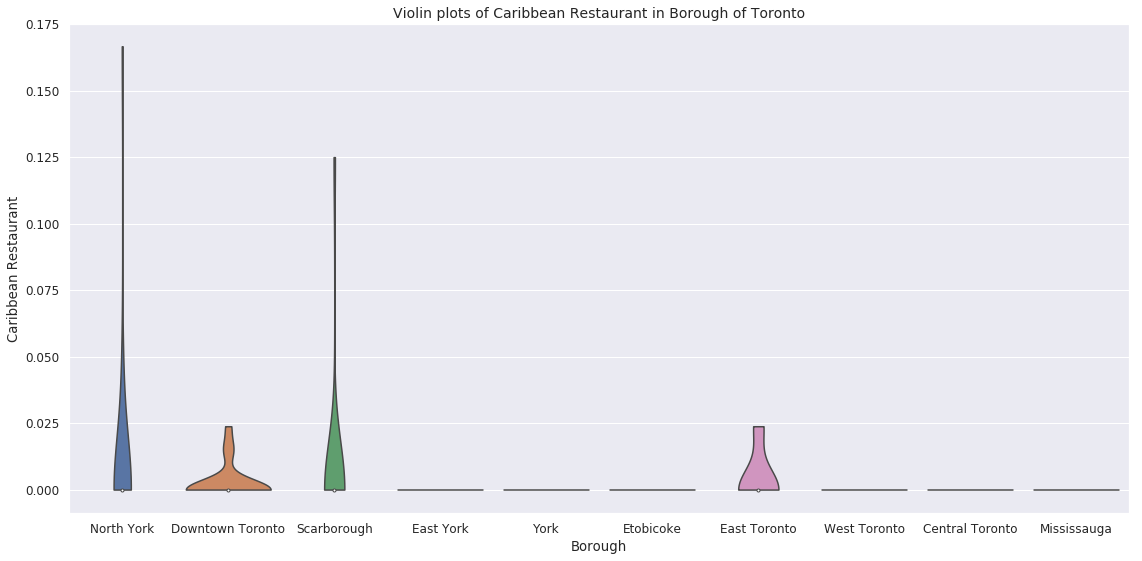

In [130]:
# Let's try Categorical plot
fig = plt.figure(figsize=(19,9))

sns.set(font_scale=1.1)
sns.violinplot(y="Caribbean Restaurant", x="Borough", data=toronto_merged, cut=0);

plt.title('Violin plots of Caribbean Restaurant in Borough of Toronto', fontsize=14)
plt.show()

This plot helps in identifying the boroughs with densely populated Caribbean restaurants.

Lets visualize the neighborhood with Caribbean Restaurants

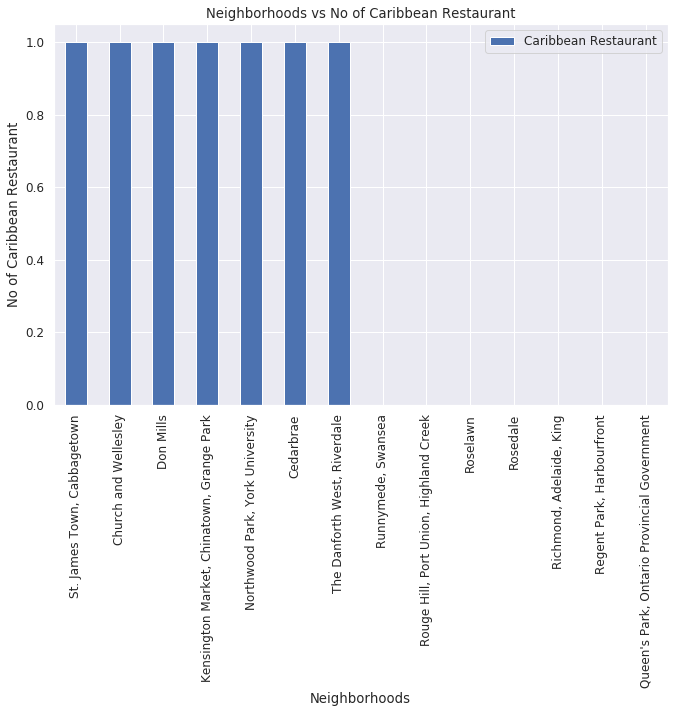

In [30]:
graph = pd.DataFrame(toronto_onehot.groupby('Neighborhood')['Caribbean Restaurant'].sum())
graph = graph.sort_values(by ='Caribbean Restaurant', ascending=False)
graph.iloc[:14].plot(kind='bar', figsize=(11,7))
plt.xlabel("Neighborhoods")
plt.ylabel("No of Caribbean Restaurant")
plt.title("Neighborhoods vs No of Caribbean Restaurant")
plt.show()

In [168]:
3.3 Relationship between neighborhood and Caribbean popultion


SyntaxError: invalid syntax (<ipython-input-168-51a15e7dd0fb>, line 1)

In [31]:
ET = ey_df.append(tey_df,sort=True).reset_index()
ET.drop('index',axis=1,inplace=True)
SN = ny_df.append(sb_df,sort=True).reset_index()
SN.drop('index',axis=1,inplace=True)
pop_ethnic_df = SN.append(ET,sort=True).reset_index()
pop_ethnic_df.drop('index',axis=1,inplace=True)
pop_ethnic_df

,%,%.1,%.2,%.3,%.4,%.5,%.6,%.7,%.8,Ethnic Origin #1,Ethnic Origin #2,Ethnic Origin #3,Ethnic Origin #4,Ethnic Origin #5,Ethnic Origin #6,Ethnic Origin #7,Ethnic Origin #8,Ethnic Origin #9,Population,Riding
0,25.9,12.1,10.6,NaN,NaN,NaN,NaN,NaN,NaN,Chinese,Iranian,Korean,NaN,NaN,NaN,NaN,NaN,NaN,117405,Willowdale
1,14.7,12.6,12.0,11.0,9.7,9.50,9.2,8.4,NaN,Canadian,English,Polish,Filipino,Scottish,Italian,Irish,Russian,NaN,112925,Eglinton-Lawrence
2,32.4,7.3,7.3,NaN,NaN,NaN,NaN,NaN,NaN,Chinese,East Indian,Iranian,NaN,NaN,NaN,NaN,NaN,NaN,109060,Don Valley North
3,12.8,9.2,8.5,8.0,7.4,NaN,NaN,NaN,NaN,Italian,East Indian,Jamaican,Vietnamese,Canadian,NaN,NaN,NaN,NaN,107725,Humber River-Black Creek
4,17.0,13.4,9.5,8.6,NaN,NaN,NaN,NaN,NaN,Filipino,Italian,Russian,Canadian,NaN,NaN,NaN,NaN,NaN,103760,York Centre
5,19.2,15.1,14.9,14.2,11.2,NaN,NaN,NaN,NaN,English,Canadian,Scottish,Irish,Chinese,NaN,NaN,NaN,NaN,101790,Don Valley West
6,10.6,10.4,10.1,8.9,8.1,8.00,7.8,NaN,NaN,East Indian,Canadian,English,Chinese,Irish,Scottish,Filipino,NaN,NaN,93170,Don Valley East
7,13.1,12.2,11.2,10.7,7.8,7.00,NaN,NaN,NaN,Filipino,East Indian,Canadian,Chinese,English,Sri Lankan,NaN,NaN,NaN,110450,Scarborough Centre
8,16.2,14.3,11.5,10.9,9.5,8.20,7.2,NaN,NaN,Canadian,English,Irish,Scottish,Filipino,East Indian,Chinese,NaN,NaN,108295,Scarborough Southwest
9,47.0,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chinese,East Indian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104225,Scarborough-Agincourt


In [32]:
pop_ethnic_df = pop_ethnic_df[['Riding', 'Population','Ethnic Origin #1', '%','Ethnic Origin #2', '%.1',
                               'Ethnic Origin #3','%.2','Ethnic Origin #4', '%.3','Ethnic Origin #5','%.4', 
                               'Ethnic Origin #6','%.5','Ethnic Origin #7', '%.6','Ethnic Origin #8', '%.7',
                               'Ethnic Origin #9','%.8',
                              ]]
pop_ethnic_df

,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7,Ethnic Origin #9,%.8
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.50,Irish,9.2,Russian,8.4,NaN,NaN
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.00,Filipino,7.8,NaN,NaN,NaN,NaN
7,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.00,NaN,NaN,NaN,NaN,NaN,NaN
8,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.20,Chinese,7.2,NaN,NaN,NaN,NaN
9,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the above dataframe we can pickout the neighborhoods with highest Caribbean population percentage by using the below given method.

In [33]:

#Filtering the riding with Jamiacan enthicy, as this is the
#only carribean enthicnity data is wildy avialbe for ethnic crowd
temp = pop_ethnic_df.loc[(pop_ethnic_df['Ethnic Origin #1'] == 'Jamaican')| 
                                      (pop_ethnic_df['Ethnic Origin #2'] == 'Jamaican')|
                                      (pop_ethnic_df['Ethnic Origin #3'] == 'Jamaican')|
                                      (pop_ethnic_df['Ethnic Origin #4'] == 'Jamaican')|
                                      (pop_ethnic_df['Ethnic Origin #5'] == 'Jamaican')|
                                      (pop_ethnic_df['Ethnic Origin #6'] == 'Jamaican')|
                                      (pop_ethnic_df['Ethnic Origin #7'] == 'Jamaican')|
                                      (pop_ethnic_df['Ethnic Origin #8'] == 'Jamaican')|
                                      (pop_ethnic_df['Ethnic Origin #9'] == 'Jamaican')]
pop_caribbean_df = pd.DataFrame(temp).reset_index()
pop_caribbean_df.drop('index',axis=1,inplace=True)

pop_caribbean_df

,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7,Ethnic Origin #9,%.8
0,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Scarborough-Rouge Park,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.4,Scottish,7.2,Irish,7.0,NaN,NaN
2,York South-Weston,115130,Portuguese,14.5,Italian,12.8,Canadian,8.7,Jamaican,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#retaining only Caribbean ethnic percentage & the neighborhood name 
columns_list = pop_caribbean_df.columns.to_list()
pop_caribbean_DF_with_percent = pd.DataFrame()
#removing Riding & Population from the column names list
del columns_list[0]
del columns_list[0]


for i in range(0,pop_caribbean_df.shape[0]):
    for j in columns_list:
        print(j)
        if pop_caribbean_df.at[i, j] == 'Jamaican':
            k = columns_list.index(j) + 1
            percent_col = columns_list[k]
            pop_caribbean_DF_with_percent = pop_caribbean_DF_with_percent.append({'Riding':pop_caribbean_df.at[i, 'Riding'], 'Population':pop_caribbean_df.at[i, 'Population']
                                                                           , 'Ethnicity': pop_caribbean_df.at[i, j], 'Percentage': pop_caribbean_df.at[i, percent_col]},ignore_index=True)

pop_caribbean_DF_with_percent 

Ethnic Origin #1
%
Ethnic Origin #2
%.1
Ethnic Origin #3
%.2
Ethnic Origin #4
%.3
Ethnic Origin #5
%.4
Ethnic Origin #6
%.5
Ethnic Origin #7
%.6
Ethnic Origin #8
%.7
Ethnic Origin #9
%.8
Ethnic Origin #1
%
Ethnic Origin #2
%.1
Ethnic Origin #3
%.2
Ethnic Origin #4
%.3
Ethnic Origin #5
%.4
Ethnic Origin #6
%.5
Ethnic Origin #7
%.6
Ethnic Origin #8
%.7
Ethnic Origin #9
%.8
Ethnic Origin #1
%
Ethnic Origin #2
%.1
Ethnic Origin #3
%.2
Ethnic Origin #4
%.3
Ethnic Origin #5
%.4
Ethnic Origin #6
%.5
Ethnic Origin #7
%.6
Ethnic Origin #8
%.7
Ethnic Origin #9
%.8


,Ethnicity,Percentage,Population,Riding
0,Jamaican,8.5,107725.0,Humber River-Black Creek
1,Jamaican,8.4,101445.0,Scarborough-Rouge Park
2,Jamaican,8.4,115130.0,York South-Weston


In [35]:
pop_caribbean_DF_with_percent['Caribbean Population'] = (pop_caribbean_DF_with_percent['Percentage'] * pop_caribbean_DF_with_percent['Population'])/100
pop_caribbean_DF_with_percent.drop(columns={'Percentage','Population','Ethnicity'},axis=1, inplace =True)
pop_caribbean_DF_with_percent.drop_duplicates(keep='first',inplace=True) 
pop_caribbean_DF_with_percent

,Riding,Caribbean Population
0,Humber River-Black Creek,9156.625
1,Scarborough-Rouge Park,8521.380
2,York South-Weston,9670.920


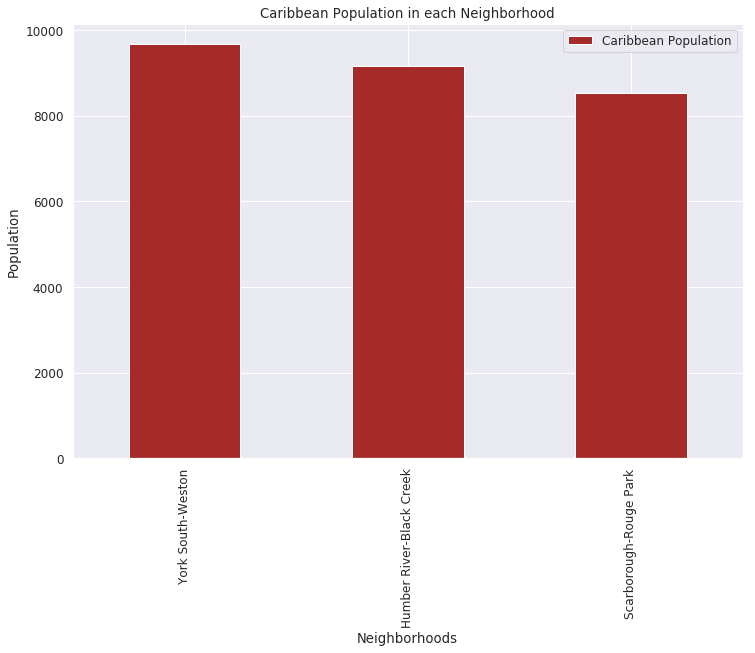

In [36]:
#visuals
bar_graph = pop_caribbean_DF_with_percent.sort_values(by='Caribbean Population', ascending=False)
bar_graph.plot(kind='bar',x='Riding', y='Caribbean Population',figsize=(12,8), color='brown')
plt.title("Caribbean Population in each Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Population")
plt.show()

This analysis & visualization of the relationship between neighborhoods & Caribean population present in those neighborhoods helps us in identifying the highly populated Caribean neighborhoods. Once we identify those neighborhoods it helps us in deciding where to place the new Caribean restaurant. Caribean restaurant placed in an densely populated Caribean neighborhood is more likely to get more Caribean customers than a restaurant placed in a neighborhood with less or no Caribean population. Thus this analysis helps in the determining the success of the new Caribean restaurant.

### 3.4 Relationship between Caribean poplation and Caribean restaurant


First get the list of neighborhoods present in the riding using the wikipedia geography section for each riding. Altering the riding names to match the wikipedia page so we can retrieve the neighborhoods present in those ridings

In [172]:
riding_list = pop_caribbean_DF_with_percent['Riding'].to_list()

riding_list

['Humber River-Black Creek', 'Scarborough-Rouge Park', 'York South-Weston']

In [173]:
riding_list2 = ['Humber River-Black Creek', 'Scarborough-Rouge Park']

In [174]:
#Scraping wiki page to get the neighborhoods of ech Ridings

Riding_neighborhood_df = pd.DataFrame()

for item in riding_list2:
        section = wikipedia.WikipediaPage(item).section('Geography')
        start = section.index('neighbourhoods of') + 17
        stop = section.index('.',start)
        Riding_neighborhood_df = Riding_neighborhood_df.append({'Riding':item, 'Neighborhoods':section[start:stop]},ignore_index=True)
    

Riding_neighborhood_df = Riding_neighborhood_df[['Riding','Neighborhoods']]
Riding_neighborhood_df

,Riding,Neighborhoods
0,Humber River-Black Creek,"Humber Summit, Humbermede, Humberlea, York Un..."
1,Scarborough-Rouge Park,"Morningside Heights, Rouge, Port Union, West ..."


In [175]:
# Due to information format on wiki page info had to be maunally extracted for York South-Weston

Riding_neighborhood_df = Riding_neighborhood_df.append(pd.DataFrame([['York South-Weston','City of York, North York, High Park']],columns=Riding_neighborhood_df.columns),ignore_index=True)
Riding_neighborhood_df

,Riding,Neighborhoods
0,Humber River-Black Creek,"Humber Summit, Humbermede, Humberlea, York Un..."
1,Scarborough-Rouge Park,"Morningside Heights, Rouge, Port Union, West ..."
2,York South-Weston,"City of York, North York, High Park"


In [176]:
#Merging the pop_caribbean_DF_with_percent dataframe containing population information with the Riding_neighborhood_df dataframe.

Neigh_pop = pd.merge(pop_caribbean_DF_with_percent, Riding_neighborhood_df, on='Riding')

Neigh_pop.drop(columns=['Riding'],inplace =True)
Neigh_pop

,Caribbean Population,Neighborhoods
0,9156.625,"Humber Summit, Humbermede, Humberlea, York Un..."
1,8521.380,"Morningside Heights, Rouge, Port Union, West ..."
2,9670.920,"City of York, North York, High Park"


In [177]:
# Divide oer nieghborhood

Neigh_pop['split_neighborhoods'] = Neigh_pop['Neighborhoods'].str.split(',') 
Neigh_pop.drop(columns=['Neighborhoods'],inplace=True,axis=1)
Neigh_pop = Neigh_pop.split_neighborhoods.apply(pd.Series).merge(Neigh_pop, left_index = True, right_index = True).drop(["split_neighborhoods"], axis = 1)\
                    .melt(id_vars = ['Caribbean Population'], value_name = "Neighborhood").drop("variable", axis = 1).dropna()

Neigh_pop.reset_index()
Neigh_pop

,Caribbean Population,Neighborhood
0,9156.625,Humber Summit
1,8521.380,Morningside Heights
2,9670.920,City of York
3,9156.625,Humbermede
4,8521.380,Rouge
5,9670.920,North York
6,9156.625,Humberlea
7,8521.380,Port Union
8,9670.920,High Park
9,9156.625,York University Heights


In [178]:
#split by nieghborhood

toronto_fete['split_neighborhoods'] = toronto_fete['Neighborhood'].str.split(',')
toronto_fete.drop(columns=['Neighborhood'],inplace=True,axis=1)
toronto_fete = toronto_fete.split_neighborhoods.apply(pd.Series).merge(toronto_fete, left_index = True, right_index = True).drop(["split_neighborhoods"], axis = 1)\
                    .melt(id_vars = ['Caribbean Restaurant'], value_name = "Neighborhood").drop("variable", axis = 1).dropna()

toronto_fete.reset_index()
toronto_fete

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Caribbean Restaurant,Neighborhood
0,0.000000,Agincourt
1,0.000000,Alderwood
2,0.000000,Bathurst Manor
3,0.000000,Bayview Village
4,0.000000,Bedford Park
5,0.000000,Berczy Park
6,0.000000,Birch Cliff
7,0.000000,Brockton
8,0.000000,Business reply mail Processing Centre
9,0.000000,CN Tower


In [179]:
pop_merged_restaurant_percent = pd.merge(Neigh_pop, toronto_fete, on='Neighborhood')
pop_merged_restaurant_percent.head(10)

,Caribbean Population,Neighborhood,Caribbean Restaurant
0,8521.38,Rouge,0.0
1,8521.38,Port Union,0.0
2,8521.38,Highland Creek,0.0



After performing the data cleaning & data analysis we can identify that their no big relationship established in terms of the Carribean population & the popular Caribbean restaurants.

Thus this marks end of the data cleaning & analyses step in this project. Next we will look into the predictive modeling. In the predictive modelling we are going to use Clustering techniques since this is analysis of unlabelled data. K-Means clustering is used to perform the analysis of the data at hand.

## 4. Predictive Modeling

### 4.1 Clustering Neighborhoods of Toronto:

First step in K-means clustering is to identify best K value meaning the number of clusters in a given dataset. To do so we are going to use the elbow method on the Toronto dataset with Caribbean restaurant percentage (i.e. toronto_merged dataframe).

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)


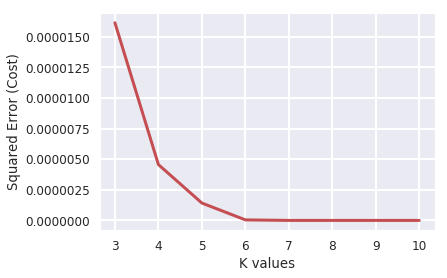

In [180]:
toronto_fete_clustering = toronto_fete.drop('Neighborhood', 1)


error_cost = []

for i in range(3,11):
    KM = KMeans(n_clusters = i, max_iter = 100)
    try:
        KM.fit(toronto_fete_clustering)
    except ValueError:
        print("error on line",i)
    
    
    
    
    #calculate squared error for the clustered points
    error_cost.append(KM.inertia_/100)

#plot the K values aganist the squared error cost
plt.plot(range(3,11), error_cost, color='r', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

Solving environment: - ^C
failed

CondaError: KeyboardInterrupt



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return_n_iter=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/c

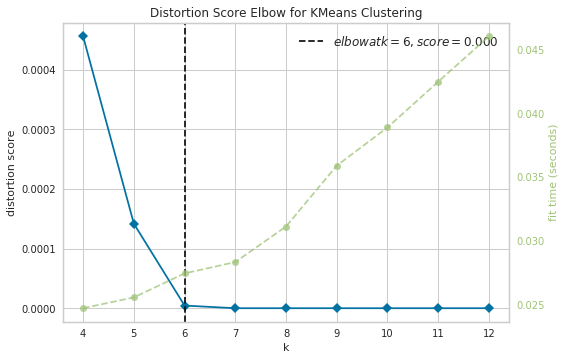

In [192]:
# Instantiate the clustering model and visualizer
!conda install -c districtdatalabs yellowbrick

from yellowbrick.cluster import KElbowVisualizer

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,13))

visualizer.fit(toronto_fete_clustering)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Cluster using K = 6 is the best value.

In [181]:
kclusters = 6

toronto_fete_clustering = toronto_fete.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_fete_clustering)

kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int32)

In [182]:
#sorted_neighborhoods_venues.drop(['Cluster Labels'],axis=1,inplace=True)
toronto_fete.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_final = Toronto_df
# merge dataframes to add latitude/longitude for each neighborhood
toronto_final = toronto_final.join(toronto_fete.set_index('Neighborhood'), on='Neighborhood')
toronto_final.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
toronto_final.reset_index(drop=True, inplace=True)
toronto_final['Cluster Labels'].astype(int)
toronto_final.head(50)

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Caribbean Restaurant
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.0,0.000000
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.0,0.000000
2,M3B,North York,Don Mills,43.745906,-79.352188,5.0,0.038462
3,M6B,North York,Glencairn,43.709577,-79.445073,0.0,0.000000
4,M3C,North York,Don Mills,43.725900,-79.340923,5.0,0.038462
5,M4C,East York,Woodbine Heights,43.695344,-79.318389,0.0,0.000000
6,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0.0,0.000000
7,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,2.0,0.023810
8,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,0.0,0.000000
9,M4E,East Toronto,The Beaches,43.676357,-79.293031,0.0,0.000000


In [183]:
map_clusters = folium.Map(location=[latt, long], zoom_start=11, width='90%', height='70%')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_final['Latitude'], toronto_final['Longitude'], toronto_final['Neighborhood'], toronto_final['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

### 4.2 Examing the Clusters:

We have total of 6 clusters such as 0,1,2,3,4,5. Let us examine one after the other.

Cluster 0 contains all the neighborhoods which has least number of Carribean restaurants. It is shown in red color in the map

In [184]:

toronto_final.loc[toronto_final['Cluster Labels'] == 0]


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Caribbean Restaurant
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.0,0.0
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.0,0.0
3,M6B,North York,Glencairn,43.709577,-79.445073,0.0,0.0
5,M4C,East York,Woodbine Heights,43.695344,-79.318389,0.0,0.0
6,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0.0,0.0
8,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,0.0,0.0
9,M4E,East Toronto,The Beaches,43.676357,-79.293031,0.0,0.0
10,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0.0,0.0
11,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512,0.0,0.0
12,M1G,Scarborough,Woburn,43.770992,-79.216917,0.0,0.0


In [185]:
#cluster 1

toronto_final.loc[toronto_final['Cluster Labels'] == 1]


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Caribbean Restaurant


In [186]:
#cluster 2
toronto_final.loc[toronto_final['Cluster Labels'] == 2]


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Caribbean Restaurant
7,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,2.0,0.02381


In [187]:
#cluster 3
toronto_final.loc[toronto_final['Cluster Labels'] == 3]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Caribbean Restaurant
16,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,3.0,0.125


In [188]:
#cluster 2
toronto_final.loc[toronto_final['Cluster Labels'] == 4]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Caribbean Restaurant
38,M4Y,Downtown Toronto,Church and Wellesley,43.66586,-79.38316,4.0,0.013699


In [189]:
#cluster 2
toronto_final.loc[toronto_final['Cluster Labels'] == 5]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Caribbean Restaurant
2,M3B,North York,Don Mills,43.745906,-79.352188,5.0,0.038462
4,M3C,North York,Don Mills,43.725900,-79.340923,5.0,0.038462


## 5. Results, Discussion and Summary:

### 5.1 Results

Sunny P's goal was to find the best area to open up there new store front. 

In trying to find this we have found that

-We have identified that only  Downtown Toronto, North York & Scarborough boroughs have of Caribbean restaurants.

-Humber Summit, Morningside Heights, City of York, Humbermede, Rouge, North York, Humberlea,Port Union, High Park, York University Heights, and	West Rouge are the most densely populated ridings in Toronto with caribbean people (Based primarily on the highest Jamaican ethicity

-Taking into consideration poulation and least amount of Caribbean restaurants, I would recommend to Sunny P's to ope up in Scarborough . This has the best balance of Caribbean population to restaurants

### 5.1 Discussion 

As stated in the results section, Scarborough would be the optimal area to open up the Caribbean restaurant and would be my recommendation to my client, Sunny Ps. This is, however based on a limited about of data provided from Foursquare API and wikipedia (not the most trusted source). Also some the data pulled was from census data that may have cnahged in recent years.

## 6. The Conclusion

Using census data, via wikipedia, Foursquare API and a ton of analysis with several python libraries we have finally concluded this project. Using tools of analysis and visualization we have had a chance to use the tools of the capstone for a real world (hypothetical) situation. There are definitely several areas for improvement like more up to date info and using other metrics to evaluate
